#**CREDIT RISK LOAN PREDICTION**


ID/X Partners Data Scientist Virtual Internship Program

Musthafa Zaki Bahar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Magang/Id x/loan_data_2007_2014.csv"
df_loan = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_loan.sample(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
312325,312325,26179392,28652218,30000,30000,30000.000000,36 months,12.49,1003.47,B,...,NaN,NaN,NaN,NaN,NaN,NaN,29000.0,NaN,NaN,NaN
128366,128366,5156155,6478452,35000,35000,35000.000000,60 months,19.05,908.89,D,...,NaN,NaN,NaN,NaN,NaN,NaN,46900.0,NaN,NaN,NaN
52036,52036,9218713,11040617,7200,7200,7200.000000,36 months,13.98,246.01,C,...,NaN,NaN,NaN,NaN,NaN,NaN,6300.0,NaN,NaN,NaN
10691,10691,825982,1034821,5000,5000,4987.633614,60 months,12.99,113.74,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167846,167846,3295032,4067240,10000,10000,10000.000000,36 months,11.14,328.06,B,...,NaN,NaN,NaN,NaN,NaN,NaN,42000.0,NaN,NaN,NaN
398153,398153,15250713,17323110,18000,18000,17950.000000,60 months,17.57,452.89,D,...,NaN,NaN,NaN,NaN,NaN,NaN,35300.0,NaN,NaN,NaN
404452,404452,14609828,16672138,16000,16000,16000.000000,60 months,15.61,385.79,C,...,NaN,NaN,NaN,NaN,NaN,NaN,43600.0,NaN,NaN,NaN
427959,427959,12895517,11932228,12075,12075,12075.000000,36 months,15.31,420.42,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29400.0,NaN,NaN,NaN


In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df_loan.drop(columns='Unnamed: 0',inplace=True)

## Target Data Understanding

In [ ]:
# Cek variabel target

df_loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Dari loan_status yang merupakan target, dilabelkan menjadi kategori Good dan Bad. Dan berikut detail dari kategori untuk setiap label:

Good :
- In Grace Period
- Fully Paid
- Current
- Default

Bad :    
- Charged off
- Late (31-120 days)
- Late (16-30 days)
- Does not meet the credit policy. Status:Charged Off
- Does not meet the credit policy. Status:Fully Paid

In [ ]:
newloan =  df_loan

# Melabelkan target yang sudah didefinisikan
newloan['target'] = np.where((newloan['loan_status'] =='In Grace Period') | 
                         (newloan['loan_status'] =='Fully Paid') |
                         (newloan['loan_status'] =='Current') | 
                         (newloan['loan_status'] =='Default'),0,1)

In [ ]:
df = newloan.groupby('target').agg({'id':'count'}).reset_index()
df.columns = ['target','total']
df['%'] = round(df['total']*100/sum(df['total']),3)
df

,target,total,%
0,0,412943,88.56
1,1,53342,11.44


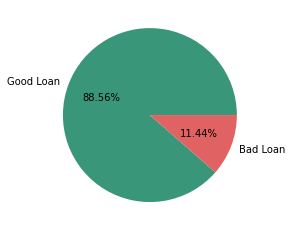

In [133]:
colors = ['#3A9679', '#E16262']
labels = ['Good Loan', 'Bad Loan']
plt.pie(df['total'],labels=labels, autopct='%.2f%%', colors=colors)
plt.show()

##Feature Selection

In [ ]:
newloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
#Melakukan random sample untuk meringankan komputasi
fs_loan = newloan.sample(frac=0.3)

In [ ]:
fs_loan = fs_loan.drop("loan_status", axis=1)

Menggunakan WOE and IV

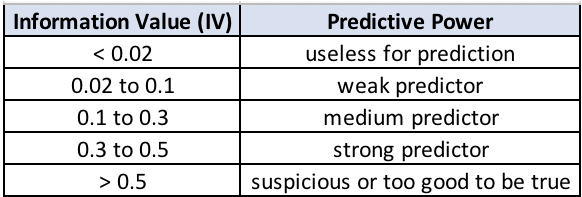

Sumber : https://sundarstyles89.medium.com/weight-of-evidence-and-information-value-using-python-6f05072e83eb\

Alasan penggunaan dari segi kelebihannya yaitu :     
- Menangangi missing value
- Menangani outliers
- Transformasi didasarkan pada nilai logaritmik dari distribusi. Ini selaras dengan fungsi keluaran regresi logistik
- Dengan menggunakan teknik binning yang tepat dapat membentuk hubungan yang monoton (baik naik atau turun) antara variabel bebas dan variabel terikat

In [ ]:
#Import Packages
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [ ]:
#Mendefinisikan fungsi untuk WOE dan IV
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [ ]:
final_iv, IV = data_vars(fs_loan,fs_loan.target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mengambil nilai IV >= 0.3 

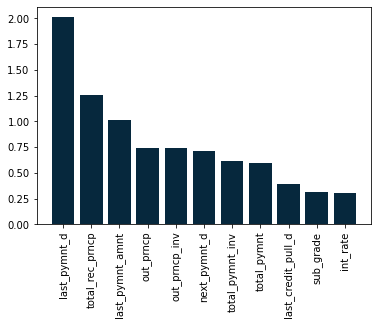

In [ ]:
df_sorted = IV[IV.IV>=0.3].sort_values('IV', ascending=False)
plt.bar('VAR_NAME', 'IV', data=df_sorted, color='#06283D')
plt.xticks(rotation=90)
plt.show()

Dengan menggunakan IV didapatkan 11 feature yang masuk dalam kategori strong predictior dan suspicious or too good to be true :    
- last_pymnt_d
- total_rec_prncp
- las_pymnt_amnt
- out_prncp
- out_prncp_inv
- next_pymnt_d
- total_pymnt_inv
- total_pymnt
- last_credit_pull_d
- sub_grade
- int_rate

Setelah didapatkan, ada tiga feature yang dibuang karena bersifat tanggal dan kurang cocok untuk dimasukkan dalam feature selection, yaitu :    
- last_pymnt_d
- next_pymnt_d
- last_credit_pull_d

In [ ]:
df_loan_fs = newloan[['total_rec_prncp', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt', 'sub_grade', 'int_rate', 'target']]
df_loan_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   total_rec_prncp  466285 non-null  float64
 1   out_prncp        466285 non-null  float64
 2   out_prncp_inv    466285 non-null  float64
 3   total_pymnt_inv  466285 non-null  float64
 4   total_pymnt      466285 non-null  float64
 5   sub_grade        466285 non-null  object 
 6   int_rate         466285 non-null  float64
 7   target           466285 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 28.5+ MB


##Preprocessing Data

In [ ]:
#Cek Persentase Null data
null_data = [(i/df_loan_fs.shape[0])*100 for i in df_loan_fs.isnull().sum()]

pd.set_option('display.max_rows', df_loan_fs.shape[1])

df_null_data = pd.DataFrame({
    'column' : df_loan_fs.columns,
    'persentase null' : null_data
})

df_null_data

,column,persentase null
0,total_rec_prncp,0.0
1,out_prncp,0.0
2,out_prncp_inv,0.0
3,total_pymnt_inv,0.0
4,total_pymnt,0.0
5,sub_grade,0.0
6,int_rate,0.0
7,target,0.0


Tidak terdapat nilai null

Pengecekan outliers tidak perlu dilakukan kembali karena saat melakukan feature selection dengan WOE sudah include didalamnya.

##Eksplonatory Data Analysis

In [ ]:
import scorecardpy as sc

In [ ]:
y = 'target'

In [ ]:
bins = sc.woebin(df_loan_fs, y)

[INFO] creating woe binning ...
Binning on 466285 rows and 8 columns in 00:00:25


{'int_rate': <Figure size 432x288 with 2 Axes>,
 'out_prncp': <Figure size 432x288 with 2 Axes>,
 'out_prncp_inv': <Figure size 432x288 with 2 Axes>,
 'sub_grade': <Figure size 432x288 with 2 Axes>,
 'total_pymnt': <Figure size 432x288 with 2 Axes>,
 'total_pymnt_inv': <Figure size 432x288 with 2 Axes>,
 'total_rec_prncp': <Figure size 432x288 with 2 Axes>}

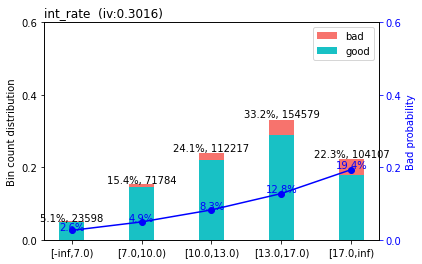

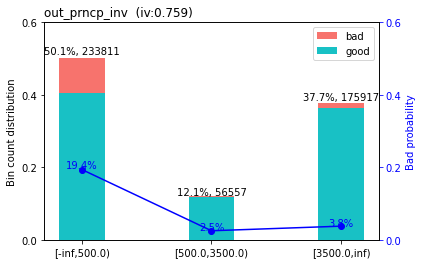

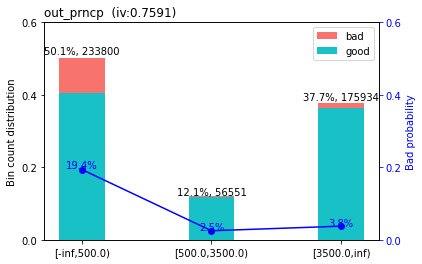

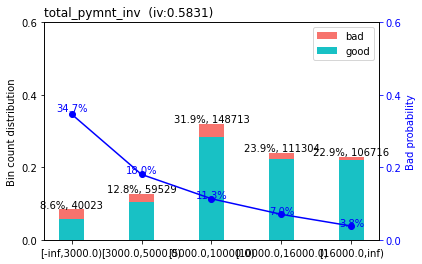

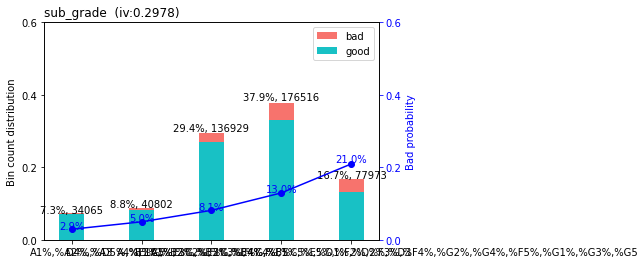

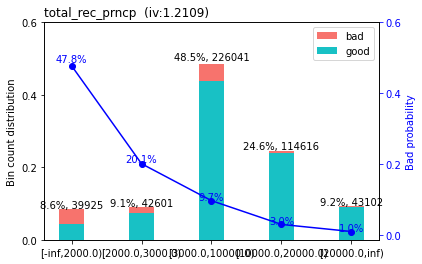

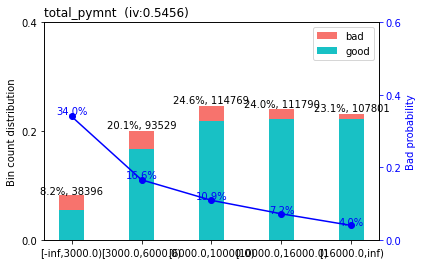

In [ ]:
sc.woebin_plot(bins)

##Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#Label Encoder sub_grade
labelencoder = LabelEncoder()
df_loan_fs['sub_grade_cat'] = labelencoder.fit_transform(df_loan_fs['sub_grade'])
df_loan_fs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,total_rec_prncp,out_prncp,out_prncp_inv,total_pymnt_inv,total_pymnt,sub_grade,int_rate,target,sub_grade_cat
0,5000.00,0.00,0.00,5831.78,5861.071414,B2,10.65,0,6
1,456.46,0.00,0.00,1008.71,1008.710000,C4,15.27,1,13
2,2400.00,0.00,0.00,3003.65,3003.653644,C5,15.96,0,14
3,10000.00,0.00,0.00,12226.30,12226.302210,C1,13.49,0,10
...,...,...,...,...,...,...,...,...,...
466281,1837.04,0.00,0.00,4677.92,4677.920000,D5,19.97,1,19
466282,6271.69,14428.31,14428.31,12343.98,12343.980000,D1,16.99,0,15
466283,2000.00,0.00,0.00,2126.58,2126.579838,A4,7.90,0,3
466284,6015.62,3984.38,3974.41,8799.57,8821.620000,D3,19.20,0,17


In [ ]:
X = df_loan_fs.drop(['target', 'sub_grade'], axis=1, inplace=False)
y = df_loan_fs['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(f"Logistic Regression: {accuracy_score(y_test, predictions)}")

Logistic Regression: 0.9389536442304599


##Evaluation

In [ ]:
# Confusion Matrix
def confMatrix(y_test, prediction) :
    plt.figure(figsize=(7, 5))
    conf_matrix = confusion_matrix(y_test, prediction)
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.title(f'Confusion Matrix', pad=16)
    plt.show()

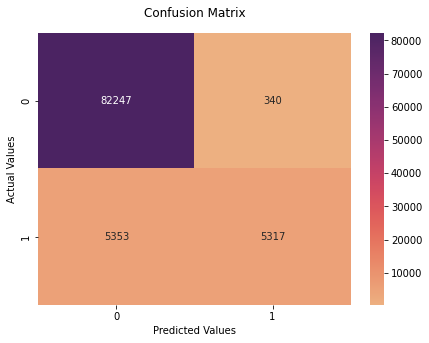


               precision    recall  f1-score   support

           0       0.94      1.00      0.97     82587
           1       0.94      0.50      0.65     10670

    accuracy                           0.94     93257
   macro avg       0.94      0.75      0.81     93257
weighted avg       0.94      0.94      0.93     93257




In [ ]:
confMatrix(y_test, predictions)
print("\n", classification_report(y_test, predictions), end="\n\n")